In [102]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Data Import & EDA

In [103]:
#https://www.geeksforgeeks.org/convert-excel-to-csv-in-python/#

data = pd.DataFrame(pd.read_csv('data.csv'))
data.head(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95
5,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,NaN,43.5,74.05,9.3,83.22,23.7,76.35,83.37,8.65,95.46
6,6019001000,4255,Fresno,93706,Fresno,-119.804314,36.697751,80.55,99.92,95-100% (highest scores),...,88.70,79.5,99.41,15.4,97.14,33.3,94.83,95.84,9.94,99.99
7,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,99.91,95-100% (highest scores),...,60.62,56.8,88.92,12.6,93.49,29.6,89.84,85.44,8.86,96.90
8,6019001202,4561,Fresno,93725,Unincorporated Fresno County area,-119.741028,36.702685,79.17,99.90,95-100% (highest scores),...,89.62,72.2,98.12,16.3,97.90,30.8,91.76,87.24,9.05,98.05
9,6077000100,3688,San Joaquin,95202,Stockton,-121.285363,37.953996,77.87,99.89,95-100% (highest scores),...,91.39,78.8,99.31,14.6,96.46,33.1,94.64,95.83,9.94,99.97


In [82]:
data.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       'CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone', 'Ozone Pctl',
       'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Lead', 'Lead Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl',

## Selecting Columns
We will focus primary on poverty level and try to find variables which we believe will correlate most with poverty level. Originally selected the following
-   Total Population
-   California County
-   Unemployment
-   Zip code
-   Poverty Percentile 
-   Lead
-   PM2.5 Pctl

But pivoted to the following

-   Total Population
-   California County
-   Unemployment
-   Zip code
-   Poverty 
-   Lead
-   PM2.5
  
The reasoning behind these choices was that if the data is already standardized it will be difficult to observed the differences between the two counties in exploration.

In [83]:
clean = data[['Total Population', 'California County', 'ZIP', 'Poverty', 'Poverty Pctl', 'Lead', 'PM2.5', 'Drinking Water', 'Education']].sort_values('Poverty Pctl', ascending=False)
clean.head()

,Total Population,California County,ZIP,Poverty,Poverty Pctl,Lead,PM2.5,Drinking Water,Education
8033,675,Ventura,93036,96.7,100.00,NaN,8.981781,663.99,NaN
355,6103,Los Angeles,90013,93.2,99.99,15.83,12.399529,787.94,25.3
7950,399,Los Angeles,91768,92.2,99.97,NaN,12.321157,752.50,54.9
422,2586,Kern,93305,91.6,99.96,91.66,15.787589,625.12,54.9
104,2852,Los Angeles,90002,91.2,99.95,75.99,12.065449,787.94,44.9


In [84]:
sd = clean[clean['California County'] == 'San Diego']
la = clean[clean['California County'] == 'Los Angeles']

sd_la = pd.concat([sd, la]).dropna()
sd_la['Is_La'] = sd_la['California County'] == 'Los Angeles'

sd_la.shape

(2902, 10)

<AxesSubplot: xlabel='California County', ylabel='Poverty'>

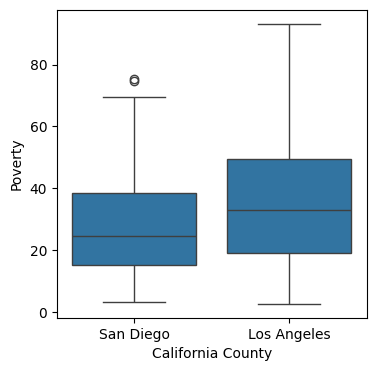

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.boxplot(x='California County', y='Poverty', data=sd_la, ax=ax)

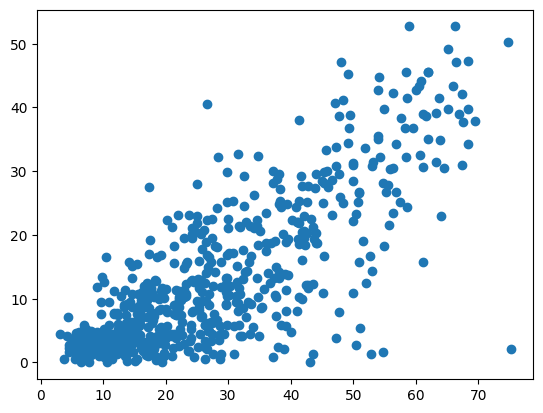

In [86]:
plt.scatter(x=sd['Poverty'],y=sd['Education'])

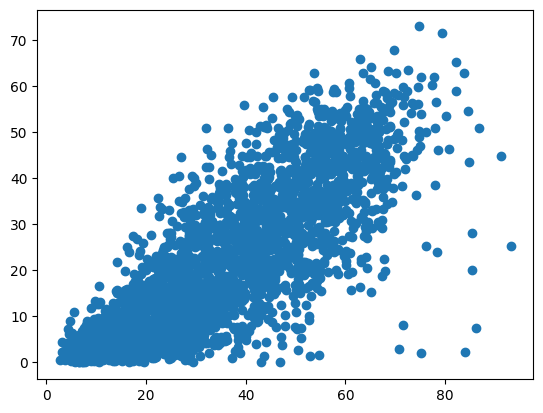

In [87]:
plt.scatter(x=sd_la['Poverty'],y=sd_la['Education'])

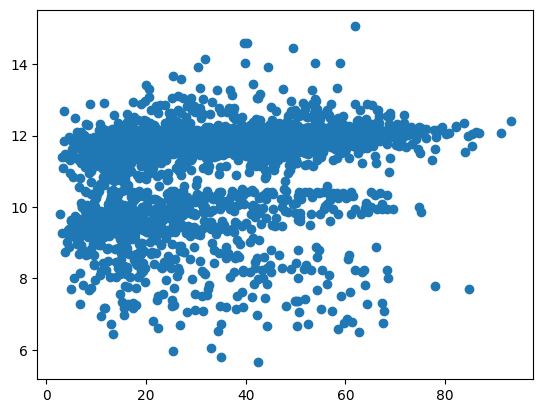

In [88]:
plt.scatter(x=sd_la['Poverty'],y=sd_la['PM2.5'])

In [89]:
model_sd = smf.ols('Poverty ~ Education', sd).fit()
print(model_sd.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7447      0.603     22.792      0.000      12.560      14.929
Education      1.0784      0.034     31.615      0.000       1.011       1.145


In [90]:
model_la = smf.ols('Poverty ~ Education', la).fit()
print(model_la.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7315      0.367     40.162      0.000      14.012      15.451
Education      0.9206      0.013     69.202      0.000       0.894       0.947


In [91]:
model_sd_la = smf.ols('Poverty ~ Education + C(Is_La)', sd_la).fit()

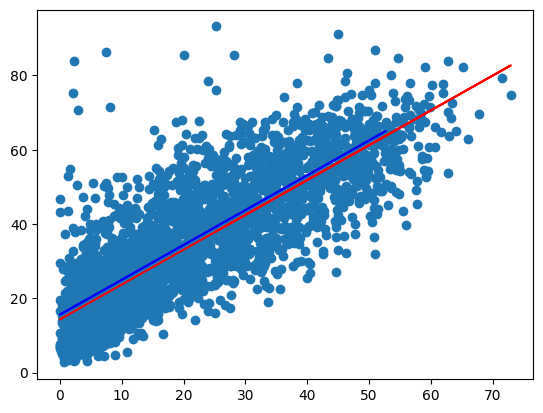

In [92]:
plt.scatter(sd_la['Education'],sd_la['Poverty'])
plt.plot(sd_la['Education'][sd_la.Is_La == 0], model_sd_la.predict(sd_la[sd_la.Is_La == 0]), color='blue')
plt.plot(sd_la['Education'][sd_la.Is_La == 1], model_sd_la.predict(sd_la[sd_la.Is_La == 1]), color='red')

Missingness?: Dropping rows where education is missing. Negligible data loss. 54 from ~2950 rows.

Five Assumptions For Lin. Regression:
1. Linear
2. Independence
3. Homoedasticity
4. Normally Distributed Error
5. Completeness

Our model to test:

$\hat{\text{Education}} = \text{Variables}$

Where,

- Lead: 0.64
- Pollution Burden: 0.44
- Asthma: 0.44
- Linguistic Iso.: 0.71
- Poverty: 0.78
- Unemployment: 0.39
- Housing Burden: 0.53
- Cardiovascular Disease: 0.47


Our variables are {TODO}

In [93]:
def present(feature_x, feature_y):
    plt.scatter(x=sd_la[feature_x],y=sd_la[feature_y])

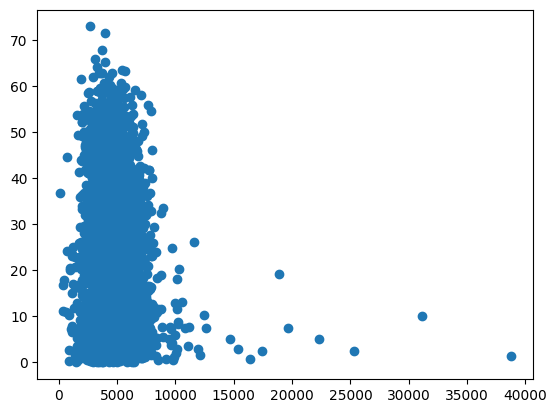

In [94]:
present("Total Population", "Education")

In [ ]:
'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 
'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats', 
'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Pollution Burden',
'Asthma', 'Asthma Pctl', 'Low Birth Weight',  


'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden', 
'Pop. Char. ', 'Cardiovascular Disease', 'Education'

<AxesSubplot: >

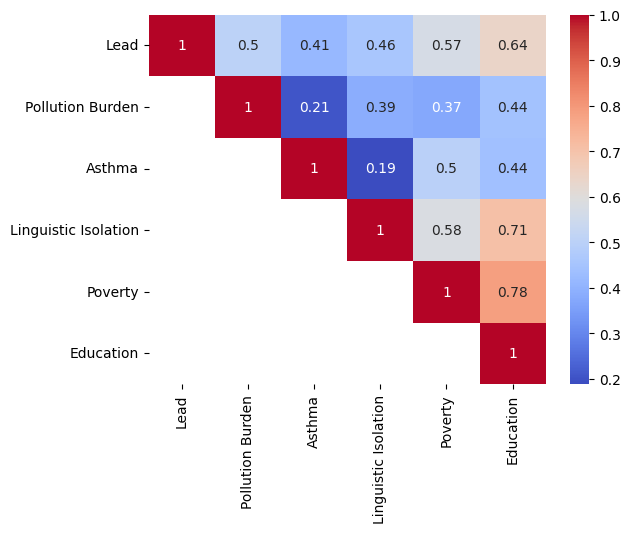

In [112]:
drop_data = data[['Lead', 'Pollution Burden', 'Asthma', 'Linguistic Isolation', 'Poverty', 'Education']]
variables = drop_data.columns
corr_table = drop_data[variables].corr() 
sns.heatmap(corr_table, annot=True, cmap='coolwarm', mask=np.tril(corr_table, k=-1))